


### Preparación de datos: Realizar la preparación de los datos teniendo en cnuenta las características de los algoritmos de agrupación a emplear.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs



df = pd.read_csv("Datos_SenecaféAlpes.csv", sep=";")



df


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.00,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.00,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.00,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.60,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.00,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,G005192,83266,1117778.00,448.473710,237.747098,Alargado,0.847920,84030.0,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319,NaN,Lavado
14287,G013419,39857,755392.00,283.623668,179.430885,Alargado,0.774448,40330.0,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183,Normal,Natural
14288,G005391,90004,1156599.00,456.836383,252.353553,Alargado,0.833583,90790.0,NaN,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035,Normal,Lavado
14289,G000861,38426,711412.00,246.696608,198.555756,redondeado,0.593467,38799.0,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826,NaN,NaN


In [37]:
print(df.columns)
print(df.shape)

Index(['ID', 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'RelacionAspecto', 'Excentricidad', 'AreaConvexa',
       'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad',
       'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4',
       'DefectoVisible', 'MétodoSecado'],
      dtype='object')
(14291, 19)


In [38]:
# Tipos de datos y valores nulos
df.info()

# Estadísticas descriptivas de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Lo primero que vamos a relizar será eliminar la columna de id ya que no aporta información relevante para el entrenamiento de los modelos a realizar

In [39]:
df = df.drop(columns="ID")

Lo primero a realizar será una limpieza basica de datos sobre nulos y duplicados. Ya que los algoritmos de clustering no funcionan bien si usamos datos nulos y puede crear ruido inncesario si usamos columnas duplicadas

In [40]:
# Valores nulos
df.isna().sum()

# Duplicados
df.duplicated().sum()

np.int64(462)

In [41]:
# --- Guardar cantidad antes ---
antes = df.shape[0]

# --- Eliminar granos con valores nulos o granos duplicados ---
df = df.dropna()
df = df.drop_duplicates()

# --- Guardar cantidad después ---
despues = df.shape[0]


print(f"Filas antes: {antes}")
print(f"Filas después: {despues}")
print(f"Se eliminaron {antes - despues} duplicados o nulos")




Filas antes: 14291
Filas después: 3494
Se eliminaron 10797 duplicados o nulos


Antes de realizar el one_hot_encoding, tenemos que estandarizar los datos de aquellas columnas categoricas, por si hay algún error de tipado dentro de los datos.

In [42]:
categoricas = ["RelacionAspecto", "DefectoVisible", "MétodoSecado"]

for categorica in categoricas:
    print(df[categorica].value_counts())

print(df.columns)

RelacionAspecto
Alargado      3052
Redondeado     431
alargado        10
redondeado       1
Name: count, dtype: int64
DefectoVisible
Normal    2759
normal     735
Name: count, dtype: int64
MétodoSecado
Lavado     1574
Natural    1169
lavado      432
natural     299
Honey        16
honey         4
Name: count, dtype: int64
Index(['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'RelacionAspecto', 'Excentricidad', 'AreaConvexa',
       'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad',
       'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4',
       'DefectoVisible', 'MétodoSecado'],
      dtype='object')


Como vemos que hay varios errores de tipado, vamos a corregirlos

In [43]:
df['RelacionAspecto'] = df['RelacionAspecto'].replace({
    'alargado': 'Alargado',
    'redondeado': 'Redondeado'
})

df['DefectoVisible'] = df['DefectoVisible'].replace({
    'normal': 'Normal',
})

df['MétodoSecado'] = df['MétodoSecado'].replace({
    'lavado': 'Lavado',
    'natural': 'Natural',
    'honey' : 'Honey'
})

Lo siguiente que se realizará será el one_hot_encoding para las variables categoricas, que identificamos 3, RelaciónAspecto: Indica si el grano es Alargado (>1.3) o Redondeado (≤1.3), DefectoVisible: Permite diferenciar entre granos sanos normales y granos con defectos visibles (Normal, Defectuoso) y MétodoSecado: Refleja una categoría relevante en el dominio cafetero, usada en caracterización de calidad y perfiles de taza (Natural, Lavado, Honey).

In [44]:
# --- 1. One-Hot Encoding para variables categóricas ---
df_encoded = pd.get_dummies(df, columns=["RelacionAspecto", "DefectoVisible", "MétodoSecado"])

print("Shape final de dataframe:", df_encoded.shape)
df_encoded.head(5)

Shape final de dataframe: (3494, 21)


,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,...,FactorForma1,FactorForma2,FactorForma3,FactorForma4,RelacionAspecto_Alargado,RelacionAspecto_Redondeado,DefectoVisible_Normal,MétodoSecado_Honey,MétodoSecado_Lavado,MétodoSecado_Natural
2,59965,994266.00,389.088529,197.967275,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,...,0.006489,0.001018,0.504326,0.991211,True,False,True,False,False,True
4,39324,737773.00,262.520242,191.176858,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,...,0.006676,0.002174,0.726511,0.997630,True,False,True,False,True,False
10,39948,731068.00,244.969135,207.964148,0.528489,40386.0,225.529096,0.772032,0.989155,0.939268,...,0.006132,0.002717,0.847583,0.998402,False,True,True,False,True,False
11,39392,746.64,265.915971,189.144664,0.702894,39836.0,223.954130,0.725291,0.988854,0.887964,...,0.006751,0.002095,0.709299,0.997194,True,False,True,False,False,True
19,47899,825844.00,317.342519,194.281893,0.790691,48932.0,246.955261,0.790569,0.978889,0.882552,...,0.006625,0.001499,0.605592,0.989181,True,False,True,False,True,False


Lo siguiente que vamos a realizar será usar un StandardScaler() ya que vemos queh ya algunas columnas con datos numericos muchos más grandes que los otros

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

df_scaled.head(5)
df_scaled.columns



Index(['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida',
       'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2',
       'FactorForma3', 'FactorForma4', 'RelacionAspecto_Alargado',
       'RelacionAspecto_Redondeado', 'DefectoVisible_Normal',
       'MétodoSecado_Honey', 'MétodoSecado_Lavado', 'MétodoSecado_Natural'],
      dtype='object')

# 1. Preparación de datos

## 1.1. Lectura y estructura inicial
- Fuente: `Datos_SenecaféAlpes.csv` (separador `;`).
- Dimensión inicial: **14 291 filas × 19 columnas**.
- Columnas: `ID`, `Area`, `Perimetro`, `LongitudEjeMayor`, `LongitudEjeMenor`, `RelacionAspecto`, `Excentricidad`, `AreaConvexa`, `DiametroEquivalente`, `Medida`, `Solidez`, `Redondez`, `Compacidad`, `FactorForma1`, `FactorForma2`, `FactorForma3`, `FactorForma4`, `DefectoVisible`, `MétodoSecado`.
- Evidencia: vista de `df`, `df.columns`, `df.shape`.

---

## 1.2. Tipos y valores faltantes (estado inicial)
`df.info()` muestra faltantes (no nulos < 14 291) en varias columnas. Ejemplos de no nulos observados:
- `LongitudEjeMayor`: **13 890**
- `Excentricidad`: **13 687**
- `AreaConvexa`: **12 868**
- `DiametroEquivalente`: **12 368**
- `Solidez`: **11 985**
- `Redondez`: **12 228**
- `Compacidad`: **13 641**
- `FactorForma1`: **13 172**
- `FactorForma2`: **13 185**
- `FactorForma4`: **13 132**
- `DefectoVisible`: **11 356**
- `MétodoSecado`: **13 704**

Evidencia: salidas de `df.info()` y `df.describe()`.

---

## 1.3. Exclusión de variable no informativa
- Se eliminó la columna **`ID`** por ser identificador y no aportar señal morfológica para el clustering.
- Evidencia: celda con `df.drop(columns='ID')`.

---

## 1.4. Limpieza por nulos y duplicados
- Duplicados iniciales: **462** (`df.duplicated().sum()`).
- Transformaciones aplicadas: primero eliminación de filas con nulos (`dropna`) y luego eliminación de duplicados (`drop_duplicates`).
- Filas antes: **14 291**  
- Filas después: **3 494**  
- Registros eliminados por nulos o duplicados: **10 797**
- Evidencia: impresiones de “Filas antes/después” y mensaje “Se eliminaron 10797 duplicados o nulos”.

---

## 1.5. Normalización de categorías
Se detectaron variantes de escritura y se normalizaron:
- `RelacionAspecto`: `alargado → Alargado`, `redondeado → Redondeado`
- `DefectoVisible`: `normal → Normal`
- `MétodoSecado`: `lavado → Lavado`, `natural → Natural`, `honey → Honey`
- Evidencia: `value_counts()` antes y mapeos de `replace`.

---

## 1.6. Codificación de variables categóricas (One-Hot)
- Columnas codificadas: `RelacionAspecto`, `DefectoVisible`, `MétodoSecado`.
- Resultado tras `get_dummies(...)`: **3 494 filas × 21 columnas**.
- Nuevas columnas (ejemplos): `RelacionAspecto_Alargado`, `RelacionAspecto_Redondeado`, `DefectoVisible_Normal`, `MétodoSecado_Lavado`, `MétodoSecado_Natural`, `MétodoSecado_Honey`.
- Evidencia: `df_encoded.shape` y `df_encoded.head()`.

---

## 1.7. Estandarización
- Se aplicó `StandardScaler()` a todas las columnas de `df_encoded` para trabajar en **z-score** (media 0, desvío 1) y hacer comparables las distancias entre variables con escalas distintas.
- Salida final para modelamiento: **`df_scaled` con 3 494 filas × 21 columnas**.
- Evidencia: creación de `df_scaled`, `df_scaled.head()` y `df_scaled.columns`.

---

## Estado final de la fase
- Dataset listo para clustering: **sin `ID`, sin nulos, sin duplicados**, categorías normalizadas, variables codificadas y todas las dimensiones estandarizadas.  
- DataFrame de trabajo: **`df_scaled` (3 494 × 21)**.


Hallamos el numero de clusters optimo para el modelo con el metodo del codo

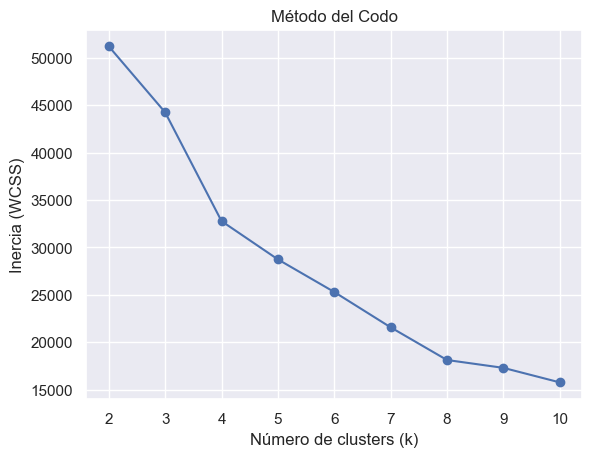

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del Codo")
plt.show()

Vemos que el codo principal podría estar en 4, así que vamos a probar con ese y +-1 para evluar cual es mejor

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

df["Cluster"] = kmeans.labels_

print(kmeans.labels_)

[1 2 0 ... 1 2 2]
